##Digital Image Enhancement:

#Image enhancement methods are critical in improving the visual quality of images for better interpretation and analysis. These methods can indeed be classified into the following categories:


#1. Spatial Domain Methods
--------------------------
Definition: Directly manipulate the pixel intensity values of an image.

Common Techniques:

~Histogram Equalization (HE): Improves contrast by redistributing pixel intensities to span the entire range.

~Gamma Correction: Adjusts the brightness of an image using a non-linear transformation.

~Smoothing: Reduces noise by averaging pixel values (e.g., mean or median filters).

~Sharpening: Enhances edges by emphasizing high-frequency components.


#2. Frequency Domain Methods
----------------------------
Definition: Modify the image's frequency components by transforming it into the frequency domain using tools like the Fourier transform.

Common Techniques:

~Low-Pass Filtering (Gaussian Filter): Removes high-frequency noise while preserving smoother details.

~High-Pass Filtering: Enhances edges and fine details by attenuating low-frequency components.

~Band-Pass Filtering: Targets specific frequency ranges for enhancement.


#3. Transform Domain Methods
-----------------------------
Definition: Operate on transformed coefficients of an image using techniques like Wavelet or Discrete Cosine Transform (DCT).

Common Techniques:

~Wavelet-Based Enhancement: Analyzes and modifies different resolution levels for localized enhancement.

~DCT-Based Enhancement: Utilized in image compression and enhancement by focusing on significant frequency components.

~PCA-Based Enhancement: Highlights important features in transformed domains like principal components.

Each method is suited for specific applications depending on the image's characteristics and the desired enhancement goals.

# **Image Enhancement Methods with Python Code**
Here’s how you can implement some of these enhancement techniques:


##Color Enhancement based method


**1.Gamma Correction:**
Gamma correction is a technique used to adjust the brightness and contrast of an image by changing the gamma value. The gamma value controls the relationship between pixel values in the input and output images. It is often used to compensate for the non-linear behavior of displays and improve the perceived quality of images

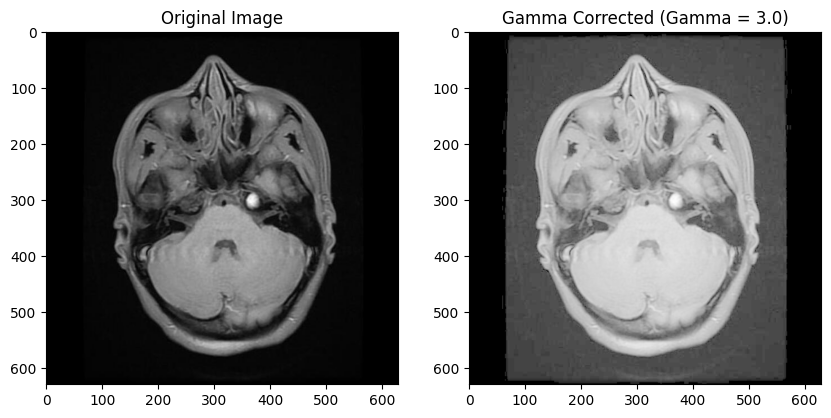

In [3]:
# Import libraries
import cv2  # For image processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizing images

# Gamma correction function
def gamma_correction(image, gamma):
    """
    Adjust image brightness using gamma correction.
    - gamma > 1: Darkens the image.
    - gamma < 1: Brightens the image.
    """
    invGamma = 1.0 / gamma  # Compute reciprocal gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")  # Lookup table
    return cv2.LUT(image, table)  # Apply correction

# Load image
image = cv2.imread('/content/8._big_gallery.jpeg')  # Load the input image in BGR format

# Apply gamma correction
gamma_value = 3.0  # Adjust this value to improve quality: >1 darkens, <1 brightens
gamma_corrected = gamma_correction(image, gamma=gamma_value)

# Display images
plt.figure(figsize=(10, 5))  # Create canvas
plt.subplot(1, 2, 1)  # Original image
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.subplot(1, 2, 2)  # Gamma-corrected image
plt.title(f'Gamma Corrected (Gamma = {gamma_value})')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.show()  # Render both images


##Histogram-Based Methods

**Contrast-limited Adaptive Histogram Equalization (CLAHE):**Contrast-Limited Adaptive Histogram Equalization (CLAHE) is an enhanced version of histogram equalization that aims to avoid over-amplification of noise by limiting the contrast enhancement locally within small regions of the image. This is achieved by dividing the image into overlapping tiles and then applying histogram equalization separately to each tile while limiting the contrast enhancement.



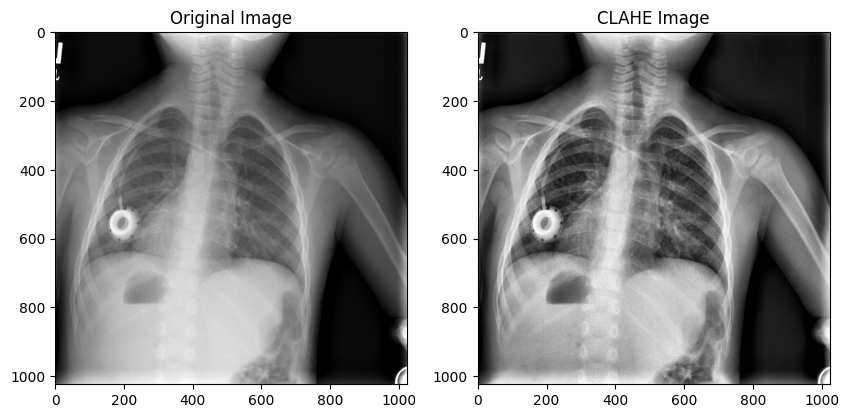

In [4]:
import cv2  # For image processing
import matplotlib.pyplot as plt  # For displaying images

# CLAHE (Contrast Limited Adaptive Histogram Equalization) function
def clahe(image):
    """
    Apply CLAHE to enhance image contrast.
    - If image is grayscale, CLAHE is applied directly.
    - If image is in color, CLAHE is applied to each channel separately.
    """
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Create CLAHE object
    # Values to change for improving quality:
    # 1. clipLimit: Higher values (3.0, 4.0) increase contrast enhancement.
    #    Lower values (1.0) reduce enhancement, making it smoother.
    # 2. tileGridSize: Smaller values ((4,4)) enhance local contrast, while larger values ((16,16)) apply global enhancement.

    if image is not None:
        if len(image.shape) == 2:  # Grayscale image
            return clahe.apply(image)
        elif len(image.shape) == 3:  # Color image
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]  # Apply CLAHE to each channel
            return cv2.merge(clahe_channels)  # Merge channels back
    else:
        return None  # Handle None image

# Load image
image_path = '/content/00011559_000.png'  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale (for simplicity)


clahe_image = clahe(image)  # Apply CLAHE

# Display the result
if clahe_image is not None:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)  # Original image
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.subplot(1, 2, 2)  # CLAHE image
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')  # Display in grayscale
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")


##Smoothing Filtering


**Averaging Filter**: The Averaging Filter is a widely used filter that smooths an image by replacing each pixel's value with the average of its neighboring pixels. This filter is commonly applied to reduce noise and remove small variations in an image, helping to enhance the overall quality. Typically, an averaging filter uses a square kernel (e.g., 3x3 or 5x5), where each element of the kernel has equal weight, resulting in a blurring effect that can be useful for preprocessing steps in image analysis.

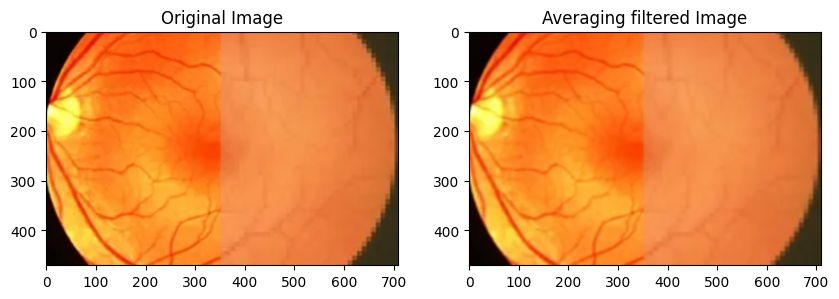

In [11]:
import cv2 as cv  # Import OpenCV for image processing
import numpy as np  # Import NumPy for numerical operations
from matplotlib import pyplot as plt  # Import Matplotlib for plotting

# Load the image
image = cv.imread('/content/Screenshot 2024-12-07 100933.png')

# Apply averaging filter (3x3 kernel)
avg = cv.blur(image, (5, 5))  # Smoothens the image by averaging neighboring pixels
# Values to change:
# 1. The kernel size (3x3): You can change this to a larger kernel (e.g., (5,5), (7,7)) for stronger smoothing or smaller (e.g., (2,2)) for lighter smoothing.

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Original image
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.subplot(1, 2, 2)  # Averaging filtered image
plt.title('Averaging filtered Image')
plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))  # Display the filtered image
plt.show()


##Frequency Domain Methods

**Fournier Filtering**: Fourier transformation is a mathematical technique that converts a signal or image from the spatial domain to the frequency domain. It enables the analysis and manipulation of different frequency components, making it widely used in image processing, such as filtering, compression, and enhancement. By applying Fourier transformation, one can emphasize or suppress specific frequencies to achieve effects like sharpening (high-pass filtering) or smoothing (low-pass filtering).


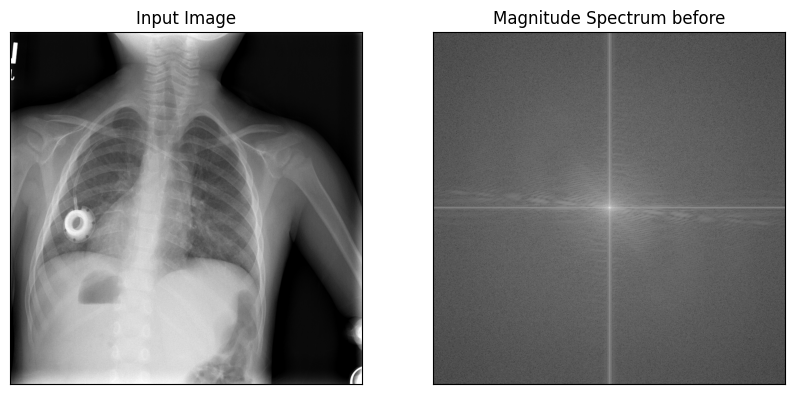

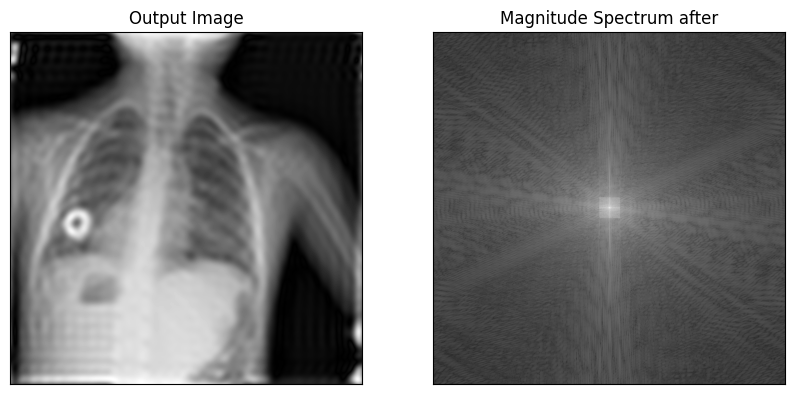

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Read the input image in grayscale mode
img = cv.imread('/content/00011559_000.png', cv.IMREAD_GRAYSCALE)

# Ensure the image is successfully loaded
assert img is not None, "file could not be read, check with os.path.exists()"

# Perform Discrete Fourier Transform (DFT) and store the result as a complex array
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the image
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Plot the original image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray')  # Display the original image
plt.title('Input Image'), plt.xticks([]), plt.yticks([])  # Set title and remove ticks
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')  # Display the magnitude spectrum
plt.title('Magnitude Spectrum before'), plt.xticks([]), plt.yticks([])  # Set title and remove ticks
plt.show()

# Get the number of rows and columns of the image
rows, cols = img.shape

# Calculate the center of the image
crow, ccol = rows // 2, cols // 2

# Create a mask with all zeros (black), then set a center square region to ones (white)
mask = np.zeros((rows, cols, 2), np.uint8)  # Two-channel mask
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1  # Define the high-pass filter mask

# Apply the mask to the frequency domain representation
fshift = dft_shift * mask

# Inverse shift to move the zero-frequency component back to the corners
f_ishift = np.fft.ifftshift(fshift)

# Perform Inverse Discrete Fourier Transform (IDFT) to return to the spatial domain
img_back = cv.idft(f_ishift)

# Compute the magnitude of the inverse transform result
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Perform DFT on the filtered image to compute its new magnitude spectrum
dft_back = cv.dft(np.float32(img_back), flags=cv.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the image
dft_shift_back = np.fft.fftshift(dft_back)

# Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum_back = 20 * np.log(cv.magnitude(dft_shift_back[:, :, 0], dft_shift_back[:, :, 1]))

# Plot the filtered image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_back, cmap='gray')  # Display the filtered image
plt.title('Output Image'), plt.xticks([]), plt.yticks([])  # Set title and remove ticks
plt.subplot(122), plt.imshow(magnitude_spectrum_back, cmap='gray')  # Display the magnitude spectrum after filtering
plt.title('Magnitude Spectrum after'), plt.xticks([]), plt.yticks([])  # Set title and remove ticks
plt.show()


##**Discussion**

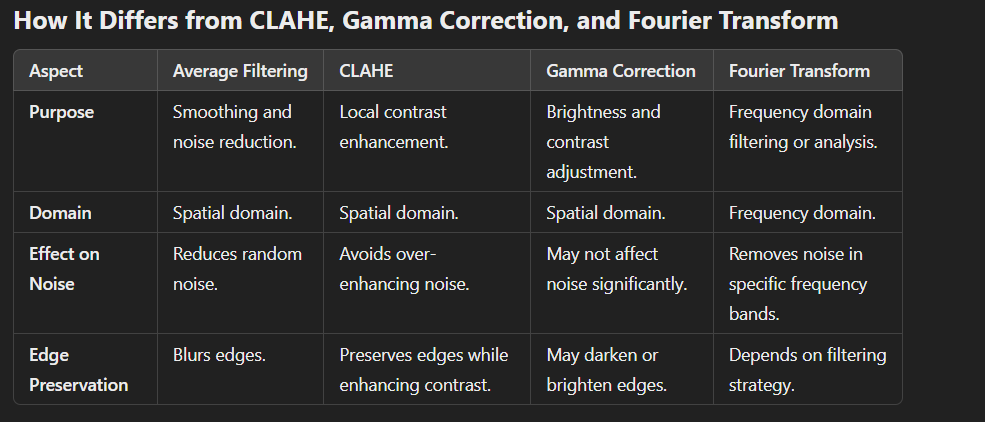

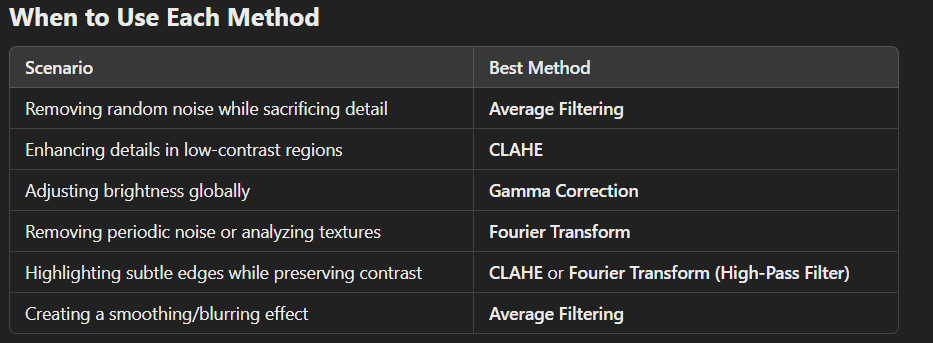